Using TensorFlow backend.
C:\Users\JINHYUK2019\anaconda3\envs\rgan\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JINHYUK2019\anaconda3\envs\rgan\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JINHYUK2019\anaconda3\envs\rgan\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JINHYUK2019\anaconda3\e

Epoch 0: discriminator loss = 0.7090023756027222, generator loss = 9.640432357788086
Epoch 1: discriminator loss = 0.6981388926506042, generator loss = 8.102184295654297
Epoch 2: discriminator loss = 0.724673867225647, generator loss = 8.790396690368652
Epoch 3: discriminator loss = 0.6981714367866516, generator loss = 8.208596229553223
Epoch 4: discriminator loss = 0.7001042366027832, generator loss = 8.178735733032227
Epoch 5: discriminator loss = 0.7258691191673279, generator loss = 7.264407157897949
Epoch 6: discriminator loss = 0.694419801235199, generator loss = 5.911067962646484
Epoch 7: discriminator loss = 0.6862706542015076, generator loss = 7.203637599945068
Epoch 8: discriminator loss = 0.7000321745872498, generator loss = 6.808909893035889
Epoch 9: discriminator loss = 0.6708729267120361, generator loss = 6.553122043609619
Epoch 10: discriminator loss = 0.6959384083747864, generator loss = 5.245669364929199
Epoch 11: discriminator loss = 0.6845526099205017, generator loss 

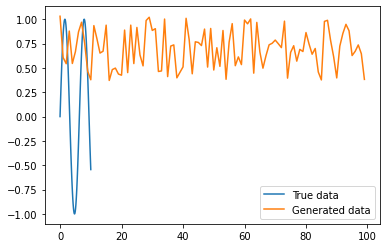

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the 1D function that we want to model
def f(x):
    return np.sin(x)

# Generate some training data
x = np.linspace(0, 10, 100)
y = f(x)

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(128, input_dim=1))
discriminator.add(Dropout(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

# Define the generator model
generator = Sequential()
generator.add(Dense(128, input_dim=1))
generator.add(Dropout(0.2))
generator.add(Dense(1))

# Compile the models
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0001))
generator.compile(loss='binary_crossentropy', optimizer=Adam(0.0001))

# Train the GAN
for epoch in range(1000):
    # Train the discriminator
    real_data = np.concatenate((x, y))
    real_labels = np.ones(len(real_data))
    fake_data = generator.predict(np.random.rand(100, 1))
    fake_labels = np.zeros(len(fake_data))
    d_loss = discriminator.train_on_batch(real_data, real_labels)
    # d_loss = discriminator.train_on_batch([real_data, fake_data], [real_labels, fake_labels])

    # Train the generator
    noise = np.random.rand(100, 1)
    fake_labels = np.ones(len(noise))
    g_loss = generator.train_on_batch(noise, fake_labels)

    # Print the losses
    print('Epoch {}: discriminator loss = {}, generator loss = {}'.format(epoch, d_loss, g_loss))

    
# Plot the generated data
generated_data = generator.predict(np.random.rand(100, 1))
plt.plot(x, y, label='True data')
plt.plot(generated_data, label='Generated data')
plt.legend()
plt.show()